In [25]:
import sys
import yaml
import os
from dotenv import dotenv_values
sys.path.append("../")
sys.path.append("./")
settings_file = "./reuma_settings.yaml"

with open(settings_file) as stream:
    config = yaml.safe_load(stream)

wd = os.path.abspath(os.path.dirname(settings_file))
os.chdir(wd)

AWS_SECRETS = config.get("bedrock").get("secrets-path")
GRADIO_SECRETS = config.get("gradio").get("secrets-path")

In [26]:
from bedrock_inference.bedrock import aws_login_mfa
mfa_token = input("Enter MFA token: ")
session = aws_login_mfa(arn=dotenv_values(AWS_SECRETS).get("AWS_ARN_MFA_DEVICE"),
                        aws_access_key_id=dotenv_values(AWS_SECRETS).get("AWS_ACCESS_KEY_ID"),
                        aws_secret_access_key=dotenv_values(AWS_SECRETS).get("AWS_SECRET_ACCESS_KEY"),
                        token=mfa_token,
                        duration=3600)

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from rags import Rag
rag = Rag(session=session,
          model=config.get("bedrock").get("model-id"),
          embedder=config.get("bedrock").get("embedder-id"),
          vector_store=config.get("vector-db-path"),
          region=config.get("bedrock").get("region"))

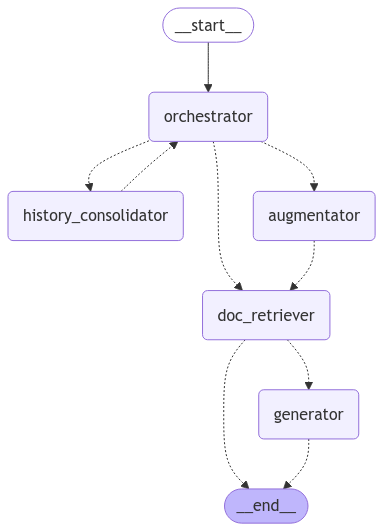

In [48]:
from IPython.display import Image, display
display(Image(rag.get_image()))

In [35]:
question = input("Enter a question: ")
answer = rag.invoke({"question": question, "history":[], "additional_context": "", "query_aug": False})
print(answer["answer"])

2025-02-24 18:17:05,345 - langchain_aws.llms.bedrock - INFO - Using Bedrock Invoke API to generate response


 La gotta viene classificata secondo i criteri del 2015, che prendono in considerazione la presenza di cristalli di urato monosodico, la distribuzione del coinvolgimento articolare, l'intensità degli episodi sintomatici, il tempo di raggiungimento del dolore massimo e di risoluzione, la natura episodica dei sintomi, la presenza di tofi rilevati clinicamente, il livello di urato/acido urico sierico e le caratteristiche di imaging/esami. Un punteggio soglia maggiore o uguale di 8 classifica un individuo come affetto da gotta.


In [ ]:
history = [{'role': 'user', 'content': question},{'role': 'assistant', 'content': answer["answer"]}]

In [52]:
question2 = input("Enter another question: ")
answer2 = rag.invoke({"question": question2, "history": history, "additional_context": "", "query_aug": False})
print(answer2)

2025-02-24 18:53:45,877 - rags - INFO - Dispatching request: {'question': 'il mio paziente ha un punteggio di 9', 'history': [{'role': 'user', 'content': 'come si classifica la gotta?'}, {'role': 'assistant', 'content': " La gotta viene classificata secondo i criteri del 2015, che prendono in considerazione la presenza di cristalli di urato monosodico, la distribuzione del coinvolgimento articolare, l'intensità degli episodi sintomatici, il tempo di raggiungimento del dolore massimo e di risoluzione, la natura episodica dei sintomi, la presenza di tofi rilevati clinicamente, il livello di urato/acido urico sierico e le caratteristiche di imaging/esami. Un punteggio soglia maggiore o uguale di 8 classifica un individuo come affetto da gotta."}], 'additional_context': '', 'query_aug': False}
2025-02-24 18:53:45,879 - rags - INFO - Consolidating previous history...
2025-02-24 18:53:45,882 - rags - INFO - messages=[SystemMessage(content='Given a chat history and the latest user question wh

{'question': ', come lo descrivo?\nAI: Lei può descrivere il suo paziente come affetto da gotta clinicamente significativa, in quanto ha un punteggio di 9 secondo i criteri del 2015 per la classificazione della gotta.', 'history': [], 'context': [Document(id='24aaa6c9-0277-47a0-aad8-e52cddd8138a', metadata={'source': '/Users/detsutut/Repositories/dheal-com-rag-demo/rag/kb_res/gotta.txt'}, page_content="1. Criteri di classificazione della Gotta 2015 I fattori chiave iniziali identificati come importanti per la classificazione della gotta sono stati la presenza di cristalli urato monosodico, la distribuzione del coinvolgimento articolare, l'intensità degli episodi sintomatici, il tempo di raggiungimento del dolore massimo e di risoluzione, la natura episodica dei sintomi, la presenza di tofi rilevati clinicamente, il livello di urato/acido urico sierico e le caratteristiche di imaging/agl esami"), Document(id='d1265dd6-6f7b-4f57-9623-a6f97cd93a1a', metadata={'source': '/Users/detsutut/Re